MSE: 1860292586.422323
R2 score: -1.9764681382757168


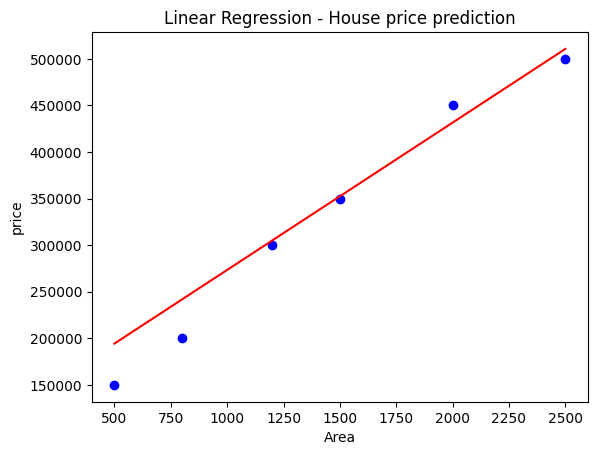

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = {
    "Area": [500, 800, 1200, 1500, 2000, 2500],
    "price": [150000, 200000, 300000, 350000, 450000, 500000]
}
df = pd.DataFrame(data)

x = df[["Area"]]
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("MSE:" , mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))
plt.scatter(x, y, color="blue")
plt.plot(x, model.predict(x), color="red")
plt.xlabel("Area")
plt.ylabel("price")
plt.title("Linear Regression - House price prediction")
plt.show()

In [ ]:
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

texts = [
    "I am very happy",
    "This is amazing",
    "I love this product",
    "You are doing great",
    "I feel fantastic today",
    "That was wonderful",
    "This makes me smile",
    "I am excited about this",
    "Everything is awesome",
    "I am proud of you",

    "I am very sad",
    "This is terrible",
    "I hate this",
    "I feel disappointed",
    "This is the worst",
    "I am upset",
    "That was horrible",
    "I feel angry",
    "This makes me frustrated",
    "I am not happy"
]

labels = [1]*10 + [0]*10

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

processed_texts = [preprocess(t) for t in texts]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

model = LogisticRegression()
model.fit(X, labels)

while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break

    processed_input = preprocess(user_input)
    input_vector = vectorizer.transform([processed_input])
    prediction = model.predict(input_vector)[0]

    if prediction == 1:
        print("Chatbot: You sound positive!")
    else:
        print("Chatbot: You seem upset.")


Accuracy: 0.0

Confusion Matrix:
 [[0 4]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       4.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

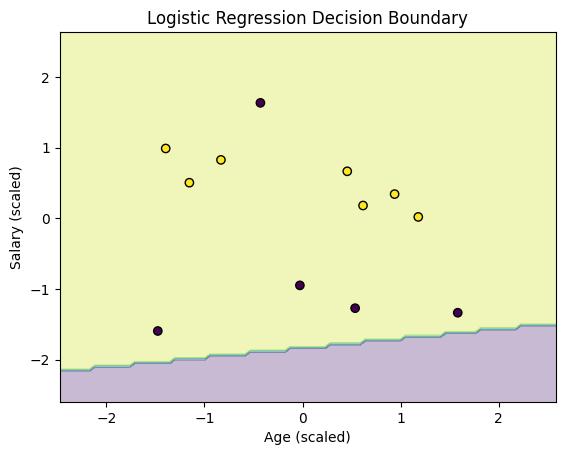

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Corrected data (same length columns)
data = {
    "Age": [22, 47, 52, 46, 55, 23, 26, 30, 60, 40, 35, 48],
    "salary": [20000, 30000, 80000, 90000, 70000, 100000, 85000, 95000, 28000, 40000, 120000, 75000],
    "purchased": [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

X = df[["Age", "salary"]]
y = df["purchased"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Decision Boundary Plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors="k")
plt.xlabel("Age (scaled)")
plt.ylabel("Salary (scaled)")
plt.title("Logistic Regression Decision Boundary")
plt.show()
